On commence par un modèle Naif: On prévoit à J+7(8) la valeur moyenne de la journée actuelle.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [22]:
stations_debit = pd.read_csv("../Data/Base/Stations_Debit.csv")
liste_stations = list(stations_debit["Code station"])

In [23]:
mesures_train_X = pd.read_csv("../Data/Base/Mesures_Train_X.csv")
mesures_train_X["Date"] = pd.to_datetime(mesures_train_X["Date"], format = "%Y/%m/%d %H:%M:%S")
mesures_train_Y = pd.read_csv("../Data/Base/Mesures_Train_Y.csv")
mesures_train_Y["Date"] = pd.to_datetime(mesures_train_Y["Date"], format = "%Y/%m/%d %H:%M:%S")

train_split_X = pd.read_csv("../Data/Base/Index_CV_X.csv")
train_split_Y = pd.read_csv("../Data/Base/Index_CV_Y.csv")

mesures_test_X = pd.read_csv("../Data/Base/Mesures_Test_X.csv")
mesures_test_X["Date"] = pd.to_datetime(mesures_test_X["Date"], format = "%Y/%m/%d %H:%M:%S")
mesures_test_Y = pd.read_csv("../Data/Base/Mesures_Test_Y.csv")
mesures_test_Y["Date"] = pd.to_datetime(mesures_test_Y["Date"], format = "%Y/%m/%d %H:%M:%S")

Pas besoin d'entrainer de modèle on apprend rien, on fait juste une moyenne et on extrapole.

In [40]:
%run Modele_Naif_fcts.py
%run Eval_fcts.py

## Score de Validation croisée.

In [45]:
cv_scores_rmse = pd.DataFrame({"Code station": liste_stations})
cv_scores_mae = pd.DataFrame({"Code station": liste_stations})
cv_scores_r2 = pd.DataFrame({"Code station": liste_stations})
for curr_split in tqdm(range(9)):
    curr_test_X = mesures_train_X[train_split_X["Test_" + str(curr_split)]]
    curr_test_Y = mesures_train_Y[train_split_Y["Test_" + str(curr_split)]]
    liste_dates = curr_test_Y["Date"]
    
    predictions_Y = fct_Modele_Naif(curr_test_X, liste_dates, liste_stations)

    curr_scores_rmse = fct_RMSE(curr_test_Y, predictions_Y, liste_stations)
    cv_scores_rmse["Split_" + str(curr_split)] = curr_scores_rmse["RMSE"]
    
    curr_scores_mae = fct_MAE(curr_test_Y, predictions_Y, liste_stations)
    cv_scores_mae["Split_" + str(curr_split)] = curr_scores_mae["MAE"]
    
    curr_scores_r2 = fct_R2(curr_test_Y, predictions_Y, liste_stations)
    cv_scores_r2["Split_" + str(curr_split)] = curr_scores_r2["R2"]

100%|██████████| 9/9 [00:02<00:00,  3.30it/s]


In [47]:
cv_moyen_RMSE = []
cv_moyen_MAE = []
cv_moyen_R2 = []

for code in liste_stations:
    score_RMSE = np.mean(cv_scores_rmse[cv_scores_rmse["Code station"] == code][["Split_" + str(i) for i in range(9)]].iloc[0,:])
    cv_moyen_RMSE.append(score_RMSE)
    score_MAE = np.mean(cv_scores_mae[cv_scores_mae["Code station"] == code][["Split_" + str(i) for i in range(9)]].iloc[0,:])
    cv_moyen_MAE.append(score_MAE)
    score_R2 = np.mean(cv_scores_r2[cv_scores_r2["Code station"] == code][["Split_" + str(i) for i in range(9)]].iloc[0,:])
    cv_moyen_R2.append(score_R2)

cv_scores_rmse["Moyenne"] = cv_moyen_RMSE
cv_scores_rmse.to_csv("../Data/Naif/CV_RMSE.csv",
                          index=False)
cv_scores_mae["Moyenne"] = cv_moyen_MAE
cv_scores_mae.to_csv("../Data/Naif/CV_MAE.csv",
                          index=False)
cv_scores_r2["Moyenne"] = cv_moyen_R2
cv_scores_r2.to_csv("../Data/Naif/CV_R2.csv",
                          index=False)

<AxesSubplot:ylabel='Density'>

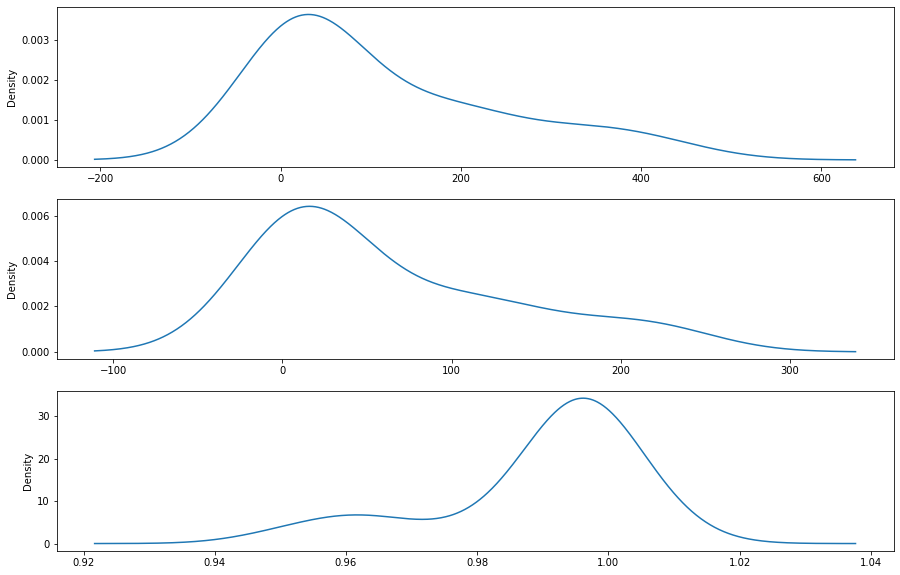

In [51]:
fig, axs = plt.subplots(3, 1, figsize = (15,10))
cv_scores_rmse["Moyenne"].plot.density(ax = axs[0])
cv_scores_mae["Moyenne"].plot.density(ax = axs[1])
cv_scores_r2["Moyenne"].plot.density(ax = axs[2])

# Score sur l'ensemble de test

In [55]:
liste_dates = mesures_test_Y["Date"]

predictions_test_Y = fct_Modele_Naif(mesures_test_X, liste_dates, liste_stations)
scores_rmse = fct_RMSE(mesures_test_Y, predictions_test_Y, liste_stations)
scores_mae = fct_MAE(mesures_test_Y, predictions_test_Y, liste_stations)
scores_r2 = fct_R2(mesures_test_Y, predictions_test_Y, liste_stations)

test_scores = pd.DataFrame({"Code station": liste_stations,
                            "RMSE": scores_rmse["RMSE"],
                            "MAE": scores_mae["MAE"],
                            "R2": scores_r2["R2"]})
test_scores

Code station        RMSE         MAE        R2
0      O0200020   27.600964   15.500545  1.002334
1      O2620010  180.860040   94.658523  0.979575
2      O6140010  331.834018  185.624858  0.924707
3      O9000010  519.794150  288.706866  0.886536
4      K0030020    5.166327    0.875275  0.999572
5      K0100020    7.696762    1.763393  1.000890
6      K0260020   22.470999    5.329458  0.998906
7      K0550010   44.819668   11.883073  0.999143
8      K0690010   60.290965   21.197950  0.992102
9      K0910050   60.552842   21.180114  0.997470
10     K4180010  143.564599   81.286080  0.980530
11     K4350020  137.834574   79.539725  1.012198
12     K6830020  174.623706  104.575663  1.017914
13     L8000020  276.764508  158.818561  0.976922
14     M5300010  417.447723  234.207386  0.970038
15     H0100010    3.778139    1.668473  0.941909
16     H0100020    5.210645    2.715982  0.983161
17     H0400010   16.294672    8.615199  0.985176
18     H0400020   13.211262    5.835990  0.976846
19     H0800011   11.268811    5.892190  1.011700
20     H0800012    3.965602    2.213471  0.993987
21     H0810010   13.983018    7.332623  1.022262
22     H1700010   30.571054   16.340412  1.046695
23     H3930020   74.055113   44.313731  1.028767
24     H4340020   78.110659   48.753125  1.017747
25     H8100021  178.402356  105.989773  1.001101

In [56]:
test_scores.to_csv("../Data/Naif/Test_scores.csv",
                   index=False)

## Représentation sur l'ensemble de test.

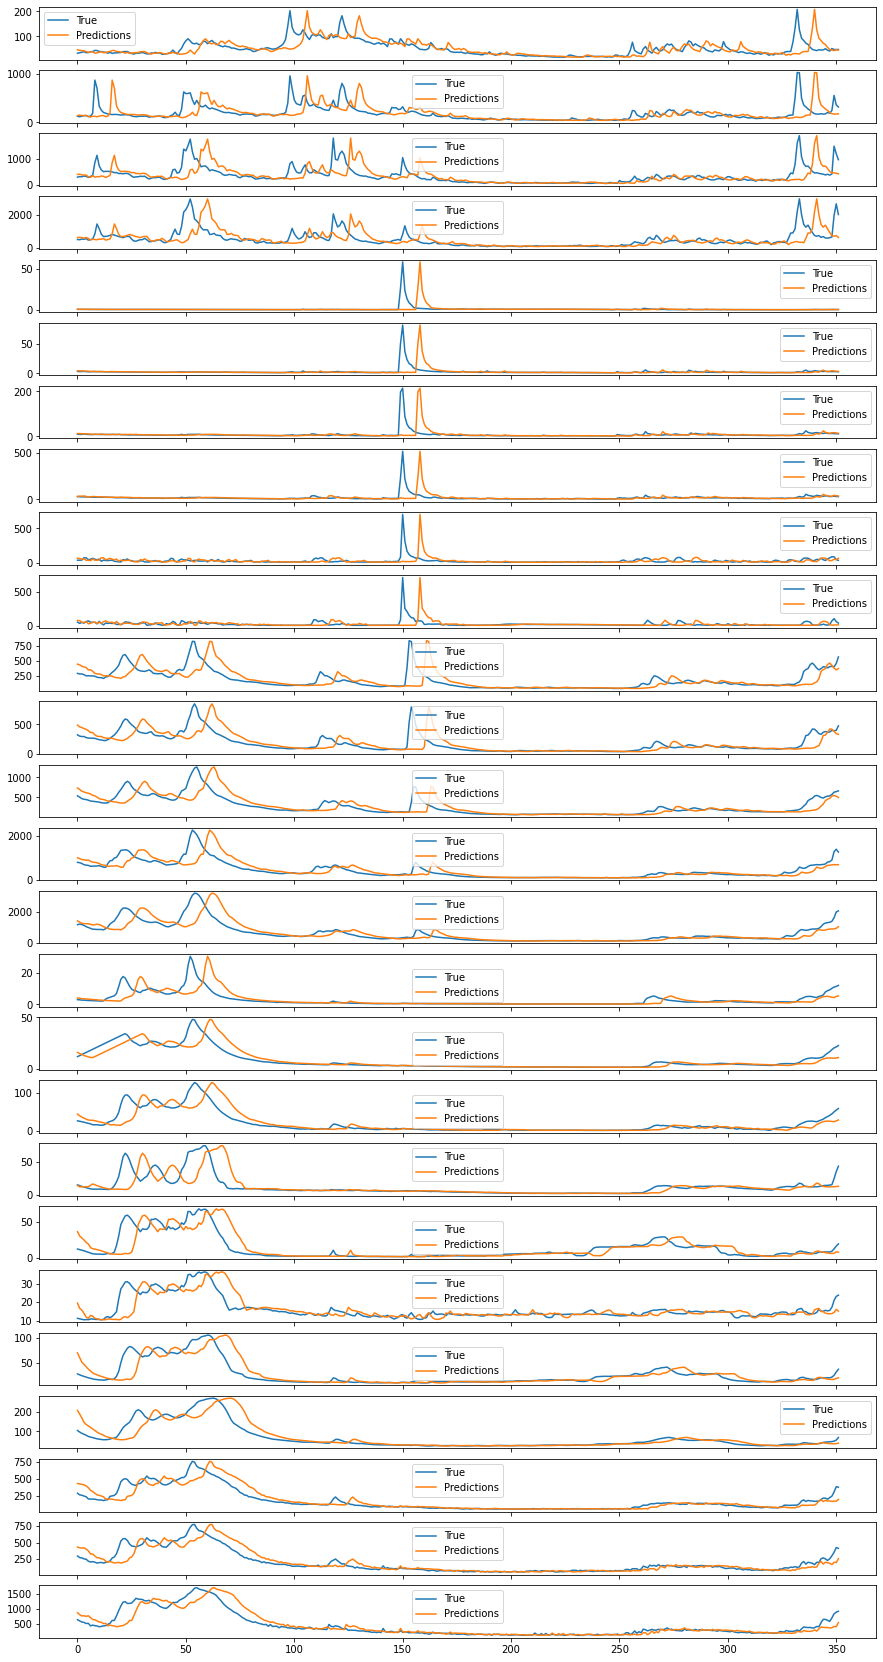

In [57]:
n_stations = len(liste_stations)
fig, axs = plt.subplots(n_stations, 1, figsize = (15,30), sharex=True)
for i in range(n_stations):
    code = liste_stations[i]
    axs[i].plot(mesures_test_Y[code], label = "True")
    axs[i].plot(predictions_test_Y[code], label = "Predictions")
    axs[i].legend()